In [13]:
import os
import glob

import numpy as np

import scipy.io as sio

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ref_dir = '../../../datasets/benchmark/sim_random/'
sim_out = '../../../datasets/benchmark/sim_random_output/'

In [3]:
exps = os.listdir(ref_dir)

Exp_18.mat


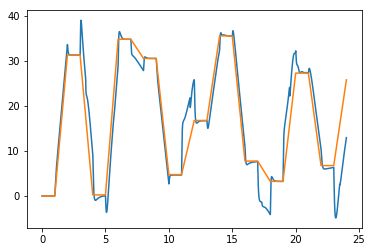

In [41]:
for exp in exps:
    print (exp)
    ref = sio.loadmat(ref_dir + exp)
    sim = sio.loadmat(sim_out + exp.split('.')[0] + '/Torque.mat')
    time = sio.loadmat(sim_out + exp.split('.')[0] + '/Time.mat')
    
    ref_trq = ref['Kvalv'][0]
    sim_trq = sim['torque'][:,0]
    
    ref_time = ref['t'][0]
    sim_time = time['time'][:, 0]
    
    
    plt.plot(sim_time, sim_trq)
    plt.plot(ref_time, ref_trq)
    break

In [72]:
sim_random_dir = '../../../datasets/benchmark/sim_random/'
sim_static_dir = '../../../datasets/benchmark/sim_static/'
sim_dynamic_dir = '../../../datasets/benchmark/sim_dynamic/'

sim_randoms = glob.glob(sim_random_dir + '*')
sim_statics = glob.glob(sim_static_dir + '*')
sim_dynamics = glob.glob(sim_dynamic_dir + '*')

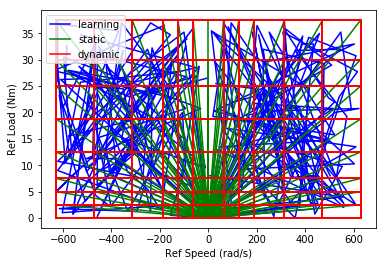

In [75]:
for sim_random in sim_randoms[:-1]:
    rand = sio.loadmat(sim_random)
    speed = rand['Speed'][0]
    load = rand['Kvalv'][0]
    
    plt.plot(speed, load, color='b')
    plt.xlabel('Ref Speed (rad/s)')
    plt.ylabel('Ref Load (Nm)')

rand = sio.loadmat(sim_randoms[-1])
speed = rand['Speed'][0]
load = rand['Kvalv'][0]

plt.plot(speed, load, color='b', label='learning')
plt.xlabel('Ref Speed (rad/s)')
plt.ylabel('Ref Load (Nm)')

for sim_static in sim_statics[:-1]:
    static = sio.loadmat(sim_static)
    speed = static['Speed'][0]
    load = static['Kvalv'][0]
    
    plt.plot(speed, load, color='g')
    
    
static = sio.loadmat(sim_statics[-1])
speed = static['Speed'][0]
load = static['Kvalv'][0]

plt.plot(speed, load, color='g', label='static')
    
    
for sim_dynamic in sim_dynamics[:-1]:
    dynamic = sio.loadmat(sim_dynamic)
    speed = dynamic['Speed'][0]
    load = dynamic['Kvalv'][0]
    
    plt.plot(speed, load, color='r')
    
dynamic = sio.loadmat(sim_dynamics[-1])
speed = dynamic['Speed'][0]
load = dynamic['Kvalv'][0]

plt.plot(speed, load, color='r', label='dynamic')
    
plt.legend(loc='upper left')
plt.savefig('random.png', dpi=500, bbox_inches=0)
